# INITIALIZE

In [265]:
## include packages

using DelimitedFiles
using DCAUtils
using Plots
using FastaIO
using StatsBase
using Random
using MultivariateStats
using Statistics
using KitMSA
using PyPlot
using PyCall
using Distributions
#using NaNStatistics
using LaTeXStrings
using DataFrames
#using Suppressor
using CSV
using JLD2
import Genie: check_pca

@pyimport seaborn as sns
@pyimport numpy as np
@pyimport scipy.stats as stats
@pyimport matplotlib.colors as cols
@pyimport matplotlib.cm as mtcm
@pyimport matplotlib.ticker as tick


# DATA

In [257]:
## read alignments from evolutionary trajectories
dbd_msa = DCAUtils.read_fasta_alignment("../../Gen.jl/data/alignments/natural/DBD_alignment.uniref90.cov80.a2m", 0.9);
@load "../../data_Genie/3_seqs_sim_short_2000chains.jld2";

In [259]:

pc_nat, pc_sils = check_pca(dbd_msa, big_msas);

θ = 0.2 threshold = 15.0
M = 24944 N = 76 Meff = 3129.1468140631705
Computing statistics...
Performing eig factorization...
Largest eigenvalues: [1.984460140850855, 1.8230030050439252]
Done


In [260]:
pc_nat_bis, pc_wts = check_pca(dbd_msa, start_msa);

θ = 0.2 threshold = 15.0
M = 24944 N = 76 Meff = 3129.1468140631705
Computing statistics...
Performing eig factorization...
Largest eigenvalues: [1.984460140850855, 1.8230030050439252]
Done


## FIG. 1C-D / 1S A

In [261]:
## contour = true produces figure 1C-D

contour = false
bw = 1.3

lw = 5.
axis_width = 2.5
fs_label = 35
fs_ax = 30
bw_exp = 0.65
fs_leg = 14
wt_size = 350
ext_l = 0.005
c_dots = ["deepskyblue","salmon","yellowgreen"]
c_dark = ["darkblue", "darkred", "darkgreen"]
;

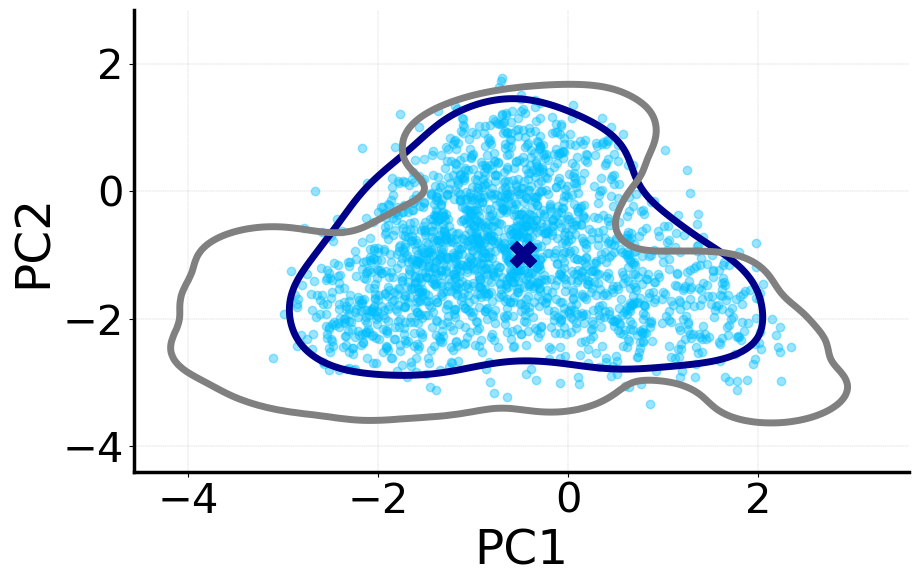

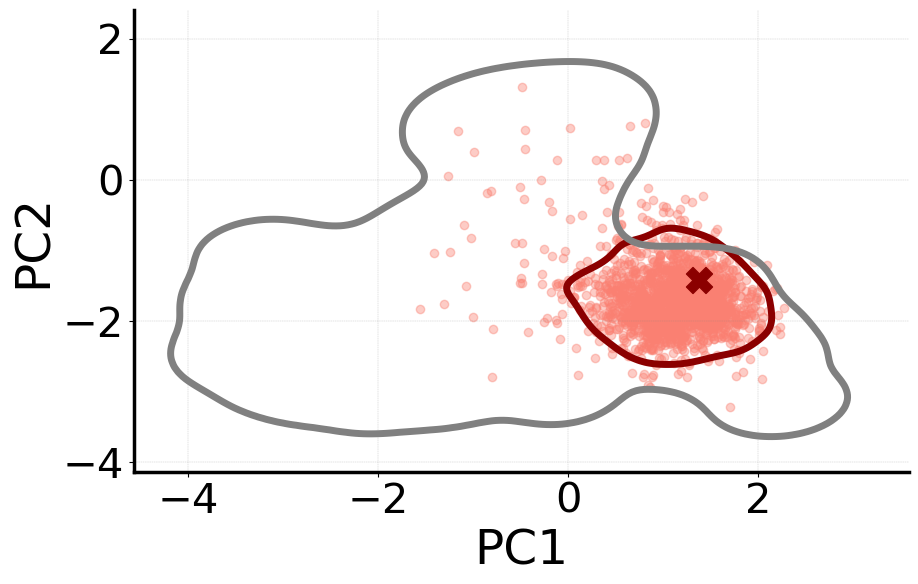

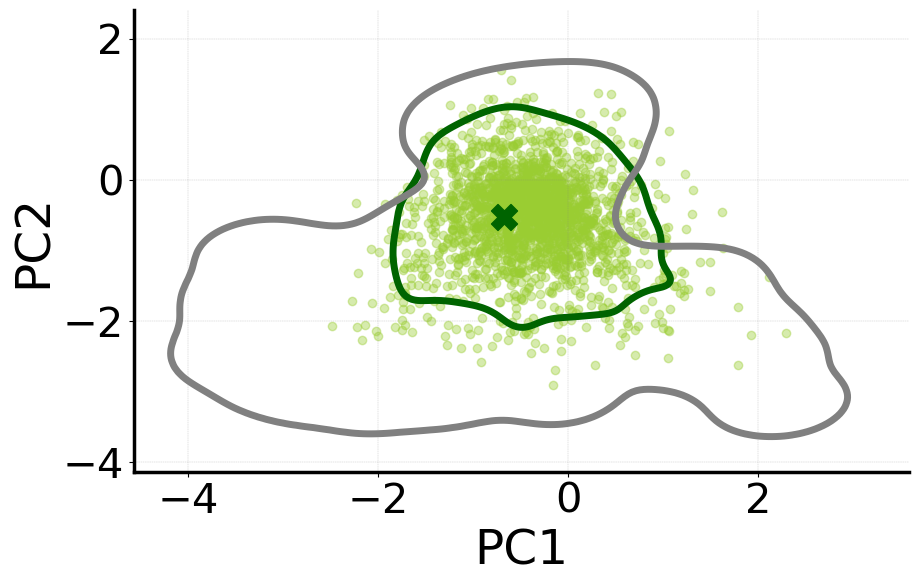

In [264]:
# define figure
#fig, (axd,) = plt.subplots(1, 1, figsize = (6, 8), dpi = 200)

for i in 1:3
    
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(10)
shapex = 1
shapey = 1



axd = plt.subplot2grid(shape=(shapex, shapey), loc=(0, 0), colspan = 1, rowspan= 1)


########
## 1D ##
########
axd.spines["right"].set_visible(false)
axd.spines["top"].set_visible(false)
axd.set_xlabel("PC1", fontsize = fs_label)
axd.set_ylabel("PC2", fontsize = fs_label) 
axd.spines["left"].set_linewidth(axis_width)
axd.spines["bottom"].set_linewidth(axis_width)
#axd.set_ylim(-4.5, 2.5)
#axd.set_xlim(-5.5, 4.5)

n = 2000
    


plt.scatter(pc_sils[i][1:n, 1], pc_sils[i][1:n, 2], color = c_dots[i], alpha = 0.4)
sns.kdeplot(x=pc_sils[i][1:n, 1], y=pc_sils[i][1:n, 2], levels=[0.1, 1.], fill = false, 
    linewidths = lw, color = c_dark[i], bw_adjust = bw)
axd.scatter(pc_wts[i,1], pc_wts[i,2], s = wt_size, marker = "X", color = c_dark[i])
sns.kdeplot(x=pc_nat[:, 1], y=pc_nat[:, 2], levels=[0.01, 1.], color = "grey", 
    linewidths = lw, fill = false,linestyles="-", label = "Natural sequences", 
    bw_adjust = bw)


axd.tick_params(axis="both", which="major", labelsize=fs_ax)
axd.grid(color="grey", linestyle="--", alpha = 0.5, linewidth=0.3, zorder = 8)
#axd.legend(bbox_to_anchor=(0, 1), loc="upper left", 
#fontsize = fs_leg, columnspacing = 0.5, handletextpad = 0.1)
plt.savefig("../prova_pca$(i).pdf", dpi = 300, bbox_inches="tight")
end